# Introduction to Pandas

<img src="./images/pandas-python.png" width="300"/>

We are going to start out journey with 'Pandas library'(created by Wes McKinney). When we refer to working in pandas, we're typically<br> talking about working within a **DataFrame**, which is going to be the main focus of this session.

## Objectives

By the end of this notebook you will be able to:

- explain why pandas is important to Data Scientists
- create pandas Dataframes from lists or a list of dictionaries
- load data from csv-files to DataFrames
- access data stored in DataFrames
- use the common features of a DataFrame

We'll be diving into pandas DataFrames, which are objects that will hold our data, allowing us to interact with it, manipulate it, and<br> eventually throw it into machine learning algorithms (if we want).

Pandas DataFrame is an object, this means that we're going to interact with it in much the same way that we interact with all of our other<br> objects in python. Before we get to actually interacting with DataFrames, though, we'll have to get one, and get one with data in it! There's<br> one quick step that we have to do before that...

## Import Pandas

In [ ]:
import pandas as pd # Standard import.

This is how we get access to everything in the pandas library. We just import it!. It's common practice to use **pd** as the alias, and we tend<br> to follow common practice whenever possible. This makes it easier for others to read our code.

## Getting a DataFrame object

There are two basic ways that we can get a pandas DataFrame object to work with. The first is by using data that is already in our Python<br> program, in conjunction with the ```DataFrame``` constructor. The second is by reading in external data through the pandas module (which we've<br> imported and made accessible via ```pd```). For reference, here are the [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for pandas DataFrames.

### Using data already in our Python program

If we are using data that is already in our Python program, then we are going to be passing that data to the ```DataFrame``` constructor. We<br> typically do this in one of two ways. The first involves passing in a list of dictionaries, whereas the second involves passing in two<br> lists. Let's dive into the first...

In [ ]:
import pandas as pd # We haven't actually done this in code yet. 
data_list = [{'a': 1, 'b': 2, 'c':3, 'd':8, 'e':9}, {'a': 4, 'b':5, 'c':6, 'd':7}]
df = pd.DataFrame(data_list) 
df

DataFrames consist of **rows** and **columns**, where the columns will be denoted and accessed via their names, and the rows will be denoted<br> and access via the indices of the DataFrame. Above, we can look at our columns and see that their names are ```a, b, c, d and e```. We can<br> similarly look at our rows and see that they are indexed by ```0 and 1```. These column names and indices are how we will access this data later.<br> How did the DataFrame constructor take our list of dictionaries and put it into the ```DataFrame``` in that format, though?

When the pandas DataFrame constructor encounters a list of dictionaries like we gave it, it interprets each dictionary to be a row in the<br> DataFrame. The keys are read as the column names and the values as the values for each column. By default, the DataFrame constructor<br> will assign a column for **every** key that it sees in **any** dictionary in the list of dictionaries. If a particular dictionary in that list doesn't have a<br> value for that key, then it assigns a ```NaN``` (stands for "not a number") value for that index-column pair. Therefore, when the pandas DataFrame<br> above got the list of dictionaries, it saw ```a, b, c, d and e``` keys, and thus created those columns. It then filled in the values associated with<br> those keys, filling in a ```NaN``` if it didn't find that key (like it didn't find ```e``` in the first dictionary in our list).

In [ ]:
data_list = [{'a': 4}, {'b':5}, {'c': 2}]
df = pd.DataFrame(data_list)

**What do you expect our DataFrame to hold now?**

In [ ]:
df

The second way of creating a dataframe from data that is already in our Python program is to pass in a list of lists as the ```data``` argument,<br> and a list of strings as the ```columns``` argument. The ```pd.DataFrame()``` constructor will assume that each individual list in the ```data```<br> argument is one row (i.e. if you pass in a list of 5 lists, your dataframe will have 5 rows). Below, we're passing in a list of 2 lists to the<br> ```data``` parameter, which means that our DataFrame will have two rows.

In [ ]:
data_vals = [[1, 2, 3], [4, 5, 6]]
data_cols = ['a', 'b', 'c']
df = pd.DataFrame(data=data_vals, columns=data_cols)
df

It's important to note that this method is not quite as flexible as using a list of dictionaries. When passing in a list of lists via the ```data``` argument,<br> we have to make sure that the greatest number of elements in any single list corresponds to the number of column names we are passing<br> in via the ```columns``` argument (no more, no less). For example:

In [ ]:
data_vals = [[1, 2], [4, 5, 6]]
data_cols = ['a', 'b']
df = pd.DataFrame(data=data_vals, columns=data_cols)

We do, however, have the flexibility of passing in some rows with 'missing' data. The key to note here, though, is that the last column<br> name will become what is filled with a ```NaN``` if a list is missing a column value (it will not be based off a key name like in our list of<br> dictionaries).

In [ ]:
data_vals = [[1, 2], [4, 5, 6]]
data_cols = ['a', 'b', 'c']
df = pd.DataFrame(data=data_vals, columns=data_cols)
df

### Reading External Data

There are many ways that we can read external data into a pandas DataFrame, and they will be called as a function that is available via the<br> ```pandas``` module.

As a result of importing the ```pandas``` module and making it accessible via ```pd```, this means that we will call all of these functions via ```pd```.<br> Each one of these functions will **return** back to us a pandas DataFrame object, populated with the external data that we read in.

The [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) will show you all of the ways that you could load external data into a DataFrame. Basically, there is a way to<br> load in data stored in any format (CSV, JSON, SQL, Excel, HTML). All of these take some form of a ```read_{data_type}``` function, which means<br> that we will call them as ```pd.read_{data_type}```.

So, if we wanted to load data in from a CSV, we would simply use:

Note that the following lines of code doesn't work, since there is no data file called ```my_data.csv``` available in the datat folde. This is<br> just for you to see the syntax of reading a file using pandas

In [ ]:
#df = pd.read_csv('my_data.csv')
df = pd.read_csv('./data/abalone.csv')

**Note:** This assumes that we have the column names in the first row of your .csv.

Above code will give an error, since we don't have a .csv file inside the data folder! This is just to give you an idea on how to<br> udse this method.

If we don't have the column names in the first row of our .csv, we could read in the .csv with the following:

In [ ]:
df = pd.read_csv('my_data.csv', header=None)

Note: This by default assigns numbers as column names (starting with 0).

If we wanted to assign the column names as we read it in, we can pass in an additional names argument, where this ```names``` argument<br> holds a list of the ```names``` we want to assign to the columns.

In [ ]:
df = pd.read_csv('my_data.csv', header=None, names=['col1', 'col2', ...., 'col12'])

## Let's look in to our data

Our data is available in the ```data``` folder inside this repo. It's called ```abalone.csv```. We will first read in the data, and then discuss<br> what it's all about.

In [ ]:
df = pd.read_csv("data/abalone.csv")

Given that our ```DataFrame``` is an object, we can imagine that it will have associated attributes and methods. There are a couple of each<br> available to us to get a general sense of our data. We have two attributes that we will frequently use on our DataFrame - these will allow<br> us to look at the shape of our data and the column names. We have four methods that are available on our dataframe for getting a general<br> sense of our data: ```info()```, ```describe()```, ```head()```, and ```tail()```. Let's take a look at what these do.

In [ ]:
df.head()

With the above command, we are gonna explore the sea and know more about Abalone, and this data is all about them, a type sea snail. <br>
They loos like:

<img src="./images/abalone.jpeg" width="300"/>

This data is taken from Kaggle, which is a data science competition platform and online community of data scientists and machine learning<br> practitioners under Google LLC. and you can access different kinds of data from there. See [here](https://www.kaggle.com/) for more info.

The original goal is the find out the age of those sea snails through other easily obtainable physical measurements, without having to<br> cutting them off and count the number of rings, which is pretty time-consuming. Below you see a table containing all attributes of the<br> snails that have been examined. 

We already saw the first rows of our DataFrame, when we executed the command ```df.head()```. By default this command shows us 5 rows, but we can<br> alter it to any number of rows we want to see:

In [ ]:
df.head(5) # or n=5

You can see the column names in our newly created DataFrame as well from above.

Also, we can check out the last rows in our DataFrame:

In [ ]:
df.tail()

Two attributes of our DataFrame are highly useful for us to look at: ```shape``` and ```columns```.

The ```shape``` will return us the number of rows and columns of our DataFrame

In [ ]:
df.shape

Now we know that we have 4177 individual observations (in this case individual sea snails).

In [ ]:
# gives us back a list of all of the column names
df.columns

 In terms of machine learning, we have 8 different features to predict the desired response (output), which in this case are the <br>```n_rings``` used to evaluate the age of the sea snails.

In the column description above, the data types of each column is stated. To check whether the data was loaded correctly and the right data<br> types were detected, we can have a look which data types were connected to the columns:

In [ ]:
df.info()

We see that the data was loaded in correctly. To get a feeling of the data, it is highly recommended to get some statistics (better even, a<br> summary of them). This helps us to evaluate the spread and central tendency of out data

Of course also for this task, there is a pretty neat function already implemented in pandas:

In [ ]:
df.describe()

You see, that in this summary, the column ```sex``` is missing. ```.describe()```will only show us numeric columns. The first row shows us how many<br> observations are available for each feature. The same information was also stored at ```.info()```. Luckily in our case, we have no missing data,<br> as the count equals the the # of rows in our DataFrame. This would be different if we would have any ```nan``` in our DataFrame.

The other values: Mean, Standard deviation, min, max and the quartiles should be familiar to all of you already.

### Getting your data

Now we know how to look into our data. What if we need to get a single row or single column from the dataset? How do we get it?<br>
Let's dive in by starting off with some indexing.

If we want to grab entire rows or columns, then we can use bracket notation to do that (just like we use bracket notation to index into<br> lists). If we want an entire column, then we're going to place the **column name** in brackets (and multiple column names in a list inside<br> those brackets). We can also sometimes access a column via dot notation on the dataframe, which we'll show in a second. If we want an<br> entire row, then we have to place **both** a **beginning and ending index** inside the brackets (it won't work to just place a single index in the<br> brackets).

In [ ]:
# Grabs the "sex" column: bracket notation
df['Sex']

In [ ]:
# Grabs the "sex" column: dot notation
df.Sex

**Note:** The dot notation won't work if the column names contain spaces! That's why it is convenient to check first, if column names<br> contain them and change them into "_" (underscored).

Luckily, the columns in our DataFrame have already underscores. If not, here is a short code snippet, which you could use to change the<br> column names:

In [ ]:
# make a copy of your dataframe
df = pd.read_csv("data/abalone.csv")
df_new = df.copy()
# make a list column names
cols = df_new.columns.tolist()
# replace space with _
cols = [col.replace(' ', '_') for col in cols]
# reassign new column names to dataframe
df_new.columns = cols
df_new

We can also access multiple columns by passing in a list of column names

In [ ]:
df[['Sex', 'Length']]

Indexing rows:

In [ ]:
# This will grab from the beginning up to but not including the row at index 3. 
df[:3]

In [ ]:
# This will not work because we didn't give it a starting **and** ending index.
df[0]

In [ ]:
# This won't work because we are trying to access a subset of rows 
# **and** columns at the same time. 
df[:1, 'Length'] 

What if we want to grab certain rows **and** certain columns, rather than just entire rows or entire columns?

If we want to grab only certain rows and columns, there two **methods** that we can use to index into a pandas DataFrame: ```loc[]``` and ```iloc[]```.<br> Note that these are **methods**, which means that we will call them via dot notation on our ```DataFrame``` object. The difference between these<br> three has to do with how we use them. ```loc[]``` is a purely label-location based indexer, ```iloc[]``` is a purely integer-location based indexer.

In [ ]:
# Loc is label based. All of these will work, because they are recognized as labels on the 
# rows (index labels) or columns (column name labels). 
df.loc[0, 'Sex'] # 0 is one of the index labels, and 'sex' is a column label.

In [ ]:
# Ranges on our index labels still work (as long as they're numeric).
df.loc[0:10, 'Sex']

In [ ]:
df.loc[10:15, ['Sex', 'Length']]

In [ ]:
# These will all fail, because they attempt to access the columns by position integers, 
# and loc only takes labels. 
df.loc[0, 0]
df.loc[0:10, 0]
df.loc[10:15, [0, 4]]

In [ ]:
# The above will all work with .iloc, though, since it takes integers (and not labels)
df.iloc[0, 0]
df.iloc[0:10, 0]
df.iloc[10:15, [0, 4]]

In [ ]:
# Using labels, though, like we did with .loc, will NOT work.
df.iloc[0, 'Sex']

### More on these:

We now know, how to grab data or a subset of a dataset from a dataframe. But it looks like we need to know exactly where the data is<br> located. What if we don't know that location? Is there a way to grab desired data by simply specifying some query parameters? Yes!<br>

There are a couple of ways that we can do this. The first way we'll look at is just through masking, whereas the second actually uses the<br> ```query()``` method available on the pandas DataFrame.

In [ ]:
# This just gives us a mask - tells us True or False whether each row fit's the condition.
df['Length'] <= 0.4

In [ ]:
# To use a mask, we actually have to use it to index into the DataFrame (using square brackets). 
df[df['Length'] <= 0.4]

Notice how only the indices that were found to be True from the condition show up in this subset of the dataframe. We've "masked" off the<br> rest of the indices that we're found to be False (hence the name **masking**).

In [ ]:
# Okay, this is cool. What if I wanted a slightly more complicated query...
df[(df['Length'] <= 0.4) & (df['Sex'] == 'F')]

In [ ]:
# So I could write an arbitrarily complicated query using that syntax... 
df[(df['Length'] <= 0.4) & (df['Length'] > 0.35) & (df['Whole weight'] > 0.25) & (df['Whole weight'] < 0.3)]

As you can see, the name of the column such a ```Whole weight``` contain a gap in between. So as we did earlier, its better to fill the gap<br> with ```_``` and then call this column from that dataframe(as in our newly created dataframe ```df_new```). That is:

In [ ]:
# So I could write an arbitrarily complicated query using that syntax... 
df_new[(df_new['Length'] <= 0.4) & (df_new['Length'] > 0.35) & (df_new['Whole_weight'] > 0.25) & (df_new['Whole_weight'] < 0.3)]

From here onwards, let's use the data from this new dataframe ```df_new```!

In [ ]:
# Or I could use the query() method that is available on our dataframe object. 
df_new.query('Length <= 0.4 and Length > 0.35 and Whole_weight > 0.25 and Whole_weight < 0.3')

In general, it's preferred to use the ```query()``` method, since it improves readability. It doesn't use loads of sets of brackets (```[]```) and<br> parentheses (```()```), but rather just one set of parentheses. It also tends to follow the Python syntax a little more closely than the mask<br> methods that we looked at above, using ```and``` instead of ```&``` to separate different specifications on our queries.

We're going to look at a couple of more things you can do with DataFrames, but to view all available attributes and methods of DataFrames,<br> we can check out the [pandas Docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). For practical examples of how DataFrames are used you can get a copy of [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781449323592/) (it's<br> written by Wes McKinney, the creator of pandas).

For those coming from R, know that the pandas DataFrame was based off the R DataFrame, and most anything we can do with an R DataFrame, we<br> can do with a pandas DataFrame. For anybody coming from a SQL background, the methods available via DataFrame's give us much, if not all,<br> of the functionality that we have available in your SQL environment.

### Groupby

Let's see how to use ```groupby``` s...

By “group by” we are referring to a process involving one or more of the following steps

- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

Read [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) for more details

In [ ]:
# first we try to groupby the sex, let's check how many different values this feature can have 
df_new['Sex'].unique()

In [ ]:
# we can also see the count of different values with this command
df_new['Sex'].nunique()

In [ ]:
df_new.groupby('Sex')   # Note that this returns back to us a groupby object. It doesn't actually 
                    # return to us anything useful until we perform some aggregation on it. 

We have tons of aggregation metrics we can get from a groupby object. Note here that we store the results of a groupby below to then<br> perform all kinds of operations on it (this is actually the preferred method if we're going to perform more than one calculation on it).

In [ ]:
# Group by sex column
groupby_obj = df_new.groupby('Sex')

# Performing an aggregation by calculating the mean
groupby_obj.mean()

In [ ]:
groupby_obj.max()

In [ ]:
groupby_obj.count()

The previous aggregation metrics gave us back a DataFrame with all of the columns minus what we grouped on. Notice that what we grouped on<br> becomes the index. What if I wanted only one column back (especially with something like count, where it is the same for every column)?<br> Well, we can do anything with this DataFrame that we did before...

In [ ]:
df_new.groupby('Sex').count()['Length']

Note we can also group by multiple columns by passing them in in a list. It will group by the first column passed in first, and then the<br> second after that (i.e. it will group by the second within the group by of the first).

In [ ]:
# Group by multiple columns
df_new.groupby(['Sex', 'Rings']).count()['Whole_weight']

Check out the [Group By documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) to look at what all you can do with the pandas ```.groupby()```.

### Sorting

Sorting is going to work much the same way as a group by. It is going to be available via a method that we call on the dataframe, <br> 
```.sort_values()```, and we are going to pass it a column or columns to sort by.

In [ ]:
df_new.sort_values('Length').head(15) # Note: this is ascending by default.
# df.sort_values('length', ascending=False) # here we change ascending to false.

We can sort by multiple columns by placing them in a list inside of the ```sort()``` method. It will sort by the first column passed in<br> first, and then the second within the sort of the first.

In [ ]:
# Sort by multiple columns
df_new.sort_values(['Length', 'Diameter'], ascending=False).head(15) # ascending=False will apply to both columns.

### Creating and Dropping Columns

Creating columns is done in one of two ways:

- Using bracket notation
- Using the ```eval()``` method on the pandas DataFrame.

Dropping columns is done using the ```df.drop()``` method on the pandas DataFrame. When dropping columns, we have to be careful to make sure to<br> tell the DataFrame to drop them in place, or assign the DataFrame with dropped columns to a new variable. You also need to make sure to<br> tell the ```drop()``` method what axis the thing you're trying to drop is on (rows are ```axis=0```, and columns are ```axis=1```).

<img src="./images/axis.png" width="500"/>

In [ ]:
# we can rename columns with `.rename()``
df_new.rename(columns={'Rings': 'nr_rings'}, inplace=True)
df_new.head()

In [ ]:
# with `.eval()` we can create new columns
# remember that in the description it is stated that the age of the snails can be calculated by adding 1.5 to the nr. of rings
df_new.eval('age = nr_rings + 1.5', inplace = True)
df_new.columns

In [ ]:
df_new.eval('weight_per_hight = Whole_weight / Diameter', inplace = True)
df_new.columns

In [ ]:
df_new.head()

Sometimes it is also necessary to delete columns, e.g. if they do not contain relevant data, or if engineered features contain the same<br> information.

The age is our newly created feature, therefore nr_rings are not containing any further information with axis=1 we define that we are<br> dropping a column, not a row by default it would be axis=0.

In [ ]:
# Remove nr_rings column
df_new.drop('nr_rings', axis=1)

In [ ]:
df_new.columns # Wait, the nr_rings column is still there... why? 
           # It's because we didn't tell it drop inplace. 

In [ ]:
df_new.drop('nr_rings', inplace=True, axis=1) 

In [ ]:
df_new.columns

### Dealing with Nulls

pandas has functions for both filling nulls (or N/As) with whatever value we want, or dropping nulls all together. To fill nulls, we use<br> the ```.fillna()``` method on the DataFrame, and to drop nulls, we call the ```.dropna()``` method on the DataFrame. In terms of the<br> ```.fillna()``` function, we can give it a default value to fill in, or a number of other methods to fill it in (padding, back filling, forward filling).<br> You can read about dealing with missing data in the docs [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html). We're not going to go into too much depth here, but want you to know that<br> this functionality exists.

As we already checked, in this dataset, there are not even missing data. So the next line of code will not do anything in this case. Just<br> so you know how to fill nans or drop them with pandas.

In [ ]:
# Notice the addition of the inplace argument here. 
# if you try to fill nans will some value: the first argument is the inserted value
df_new.fillna(-1, inplace=True)
# dropna() will drop the whole row, if nans are present
df_new.dropna(inplace=True) 

#drop nulls for one column
df_new = df_new.dropna(subset=['balcony'])
 
#fill nulls with median in specific column
df_new['col1'].fillna(df_new['col2'].median(), inplace=True)
 
#fill all nan values
df_new = df_new.fillna(df_new.median(numeric_only=True))

### Further discussion on Pandas Series

You might have noticed that in a couple of places, when we asked for certain rows/columns of the data, we got back a 1-D array that had an<br> index attached. These are examples of what pandas calls ```Series```. In the documentation for [pandas Series](http://pandas.pydata.org/pandas-docs/version/0.15.2/dsintro.html#series), you can get an idea of what they<br> can do. For the most part, we can kind of treat them like a mini DataFrame, as they have a lot of the same methods. However, there are some<br> slight differences. Since we work with DataFrame's the majority of the time, we're not going to go into any real depth on Series.

Here are some examples of things that returned series:

In [ ]:
df_new['Length'] <= 0.3

In [ ]:
type(df_new['Length'] <= 0.3)

In [ ]:
df_new.groupby('Sex').count()['age']

That was a lot of input! Don't worry, you can test and solidify your knowledge in the next notebooks.

## Summary

We have learnt that
- Pandas dataframe is the main data structure for Data Scientists
- How to use Pandas dataframe and how to convert our data to it
- How to use built-in methods to go fast

### More to learn

There are many more functions on DataFrame you can discover. Here are few links to be explored where you can find more on these topics<br> along with code snippets that can be used in your upcoming projects!
- [Book - Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781449323592/)

Part 1: Apply the following tasks on Houseprice.csv:


Reading the Dataset
Load the dataset into a pandas DataFrame and print the first 5 rows.

In [3]:
import pandas as pd
df = pd.read_csv('./data/HouseData.csv')
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


Exploring the Dataset
Show the last 10 rows of the dataset.
Display the column names.
Print the shape of the dataset (number of rows and columns).

In [ ]:
df.tail(10)



In [ ]:
df.shape

In [ ]:
df.columns

Dataset Info
Use .info() to find out the data types of each column.
Are there any missing values in the dataset? (Hint: .info() shows null counts).

In [ ]:
df.info()  #Yes — a few columns have less than 13,073 non-null values, which indicates missing data(location,size,society,bath,balcony)

Descriptive Statistics
Use .describe() to get summary statistics for numerical columns.
What is the average (mean) price of the houses price?
What is the maximum and minimum price?|

In [ ]:
df.describe()
#average (mean) price =112.528441
#maximum price = 3600.000000
#minimum price = 8.000000

Part 2: Apply the following tasks on Houseprice_noheaders.csv:

Reading the Dataset
Load the dataset into a pandas DataFrame and print the first 5 rows.
Add column names for your new dataset

In [5]:
df1 = pd.read_csv('./data/Houseprice_noheaders.csv')
df1 = pd.read_csv('./data/Houseprice_noheaders.csv',header=None)    #both are correct
df1.head(5)

,0,1,2,3,4,5,6,7,8
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [ ]:
column_names = ['area_type', 'availability', 'location', 'size', 'society',
                'total_sqft', 'bath', 'balcony', 'price']
df1 = pd.read_csv('./data/Houseprice_noheaders.csv',header=None,names=column_names)
df1.head(5)

In [ ]:
df1.info()

MINI PROJECT - PANDAS

Part 1: Data Exploration
1.	1. Load the dataset into a Pandas DataFrame and show the first 5 rows. Why is head() useful here instead of printing the whole dataset?
2.	2. Use .info() and .describe() to understand the dataset. What insights do you get about the columns (numerical vs categorical)?


In [6]:
#1
df = pd.read_csv(r"C:\Users\sruth\Documents\Greenbootcamps\DS_Python_advanced\data\cereal.csv")
df.head(5)  # because from 5 we will get an idea of dataset instead of taking whole dataset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1.0,130.0,10.0,5.0,6.0,280,25.0,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5.0,15.0,2.0,8.0,8.0,135,NaN,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1.0,260.0,9.0,7.0,5.0,320,25.0,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,NaN,140.0,14.0,8.0,NaN,330,25.0,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2.0,200.0,1.0,14.0,8.0,-1,25.0,3,1.0,0.75,34.384843


In [9]:
#2
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       50 non-null     float64
 6   sodium    68 non-null     float64
 7   fiber     58 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    70 non-null     float64
 10  potass    77 non-null     int64  
 11  vitamins  69 non-null     float64
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(9), int64(4), object(3)
memory usage: 9.8+ KB


In [151]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,50.000000,68.000000,58.000000,77.000000,70.000000,77.000000,69.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.560000,180.808824,2.856897,14.597403,7.614286,96.077922,31.521739,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,0.836904,63.982334,2.350447,4.278956,4.051455,71.286813,21.287672,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,1.000000,15.000000,1.000000,-1.000000,-1.000000,-1.000000,25.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,1.000000,140.000000,1.000000,12.000000,3.250000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,185.000000,2.250000,14.000000,7.500000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,220.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [152]:
df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          4
sodium      26
fiber       12
carbo       22
sugars      16
potass      36
vitamins     2
shelf        3
weight       7
cups        12
rating      77
dtype: int64

Part 2: Data Cleaning & Renaming

3.	3. Some column names are long (like sodium vs potass). Rename the following columns to make them clearer for future analysis:
- mfr → manufacturer
- potass → potassium
- carbo → carbohydrates
Why would renaming be useful in real projects?


In [153]:
df.rename(columns={'mfr': 'manufacturer','potass':'potassium','carbo':'carbohydrates'}, inplace=True)
df


,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1.0,130.0,10.0,5.0,6.0,280,25.0,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5.0,15.0,2.0,8.0,8.0,135,NaN,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1.0,260.0,9.0,7.0,5.0,320,25.0,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,NaN,140.0,14.0,8.0,NaN,330,25.0,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2.0,200.0,1.0,14.0,8.0,-1,25.0,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1.0,250.0,NaN,21.0,3.0,60,25.0,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1.0,140.0,NaN,13.0,12.0,25,25.0,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1.0,230.0,3.0,17.0,3.0,115,25.0,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1.0,200.0,3.0,17.0,3.0,110,25.0,1,1.0,1.00,51.592193


4.	Check if there are any missing values in the dataset.
•	If there are missing values, show how you can fill them (e.g., with mean/median) or drop them.
•	Why might you choose to fill missing values instead of dropping them?


In [10]:
df.fillna(df.median(numeric_only=True),inplace=True)
df.info()
#Dropping rows can reduce the dataset size, which is bad if data is limited.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     float64
 6   sodium    77 non-null     float64
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     float64
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     float64
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(9), int64(4), object(3)
memory usage: 9.8+ KB


Part 3: Filtering & Selection

5.	 The company wants to promote healthy cereals. Define a healthy cereal as one with:
- calories < 100
- sugar ≤ 6
- fiber ≥ 5
Filter the DataFrame using both boolean conditions and .query(). Which method do you prefer and why?


In [155]:
df[((df['calories']<100) & (df['sugars'] <= 6) & (df['fiber'] >=5))]
df.query('calories<100 and sugars<=6 and fiber >=5')  #query is better bt if column_name have space boolean is better

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1.0,130.0,10.0,5.0,6.0,280,25.0,3,1.0,0.33,68.402973
2,All-Bran,K,C,70,4,1.0,260.0,9.0,7.0,5.0,320,25.0,3,1.0,0.33,59.425505
9,Bran Flakes,P,C,90,3,1.0,210.0,5.0,13.0,5.0,190,25.0,3,1.0,0.67,53.313813


6.	 Using .loc, show only the name, calories, sugars, and fiber of these healthy cereals. Why is .loc more readable than .iloc here?

In [156]:
df.loc[:, ['name', 'calories','sugars','fiber']].query('calories<100 and sugars<=6 and fiber >=5')


,name,calories,sugars,fiber
0,100% Bran,70,6.0,10.0
2,All-Bran,70,5.0,9.0
9,Bran Flakes,90,5.0,5.0


Part 5: Creating New Columns

7.	Add a new column called “health_score”, defined as:
health_score = (fiber * 2) - sugars
Show the top 5 cereals with the highest health_score.
Why might creating new calculated columns be useful in analysis?


In [157]:
df.eval('health_score = (fiber * 2) - sugars', inplace = True)
df.head(5)

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating,health_score
0,100% Bran,N,C,70,4,1.0,130.0,10.0,5.0,6.0,280,25.0,3,1.0,0.33,68.402973,14.0
1,100% Natural Bran,Q,C,120,3,5.0,15.0,2.0,8.0,8.0,135,25.0,3,1.0,1.00,33.983679,-4.0
2,All-Bran,K,C,70,4,1.0,260.0,9.0,7.0,5.0,320,25.0,3,1.0,0.33,59.425505,13.0
3,All-Bran with Extra Fiber,K,C,50,4,1.0,140.0,14.0,8.0,7.5,330,25.0,3,1.0,0.50,93.704912,20.5
4,Almond Delight,R,C,110,2,2.0,200.0,1.0,14.0,8.0,-1,25.0,3,1.0,0.75,34.384843,-6.0


In [158]:
df.sort_values('health_score',ascending=False).head(5)


,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating,health_score
3,All-Bran with Extra Fiber,K,C,50,4,1.0,140.0,14.0,8.0,7.5,330,25.0,3,1.0,0.50,93.704912,20.5
0,100% Bran,N,C,70,4,1.0,130.0,10.0,5.0,6.0,280,25.0,3,1.0,0.33,68.402973,14.0
2,All-Bran,K,C,70,4,1.0,260.0,9.0,7.0,5.0,320,25.0,3,1.0,0.33,59.425505,13.0
57,Quaker Oatmeal,Q,H,100,5,2.0,185.0,2.7,-1.0,-1.0,110,25.0,1,1.0,0.67,50.828392,6.4
9,Bran Flakes,P,C,90,3,1.0,210.0,5.0,13.0,5.0,190,25.0,3,1.0,0.67,53.313813,5.0


Part 4: Sorting & Ranking

8.	 Sort the cereals by rating (descending) to find the top 5 highest-rated cereals.


In [159]:
df.sort_values('rating', ascending=False).head(5)


,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating,health_score
3,All-Bran with Extra Fiber,K,C,50,4,1.0,140.0,14.0,8.0,7.5,330,25.0,3,1.00,0.50,93.704912,20.5
64,Shredded Wheat 'n'Bran,N,C,90,3,1.0,185.0,4.0,19.0,7.5,140,25.0,1,1.00,0.67,74.472949,0.5
65,Shredded Wheat spoon size,N,C,90,3,1.0,185.0,3.0,20.0,7.5,120,25.0,1,1.00,0.67,72.801787,-1.5
0,100% Bran,N,C,70,4,1.0,130.0,10.0,5.0,6.0,280,25.0,3,1.00,0.33,68.402973,14.0
63,Shredded Wheat,N,C,80,2,1.0,185.0,3.0,16.0,7.5,95,25.0,1,0.83,1.00,68.235885,-1.5


9.	 Sort by sugars (ascending) and then by fiber (descending) to find cereals that are low sugar but high fiber. Why would sorting by multiple columns help here?

In [160]:
df.sort_values(by=['sugars', 'fiber'], ascending=[True, False]).head(5)


,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating,health_score
57,Quaker Oatmeal,Q,H,100,5,2.0,185.0,2.70,-1.0,-1.0,110,25.0,1,1.0,0.67,50.828392,6.4
11,Cheerios,G,C,110,6,2.0,290.0,2.00,17.0,1.0,105,25.0,1,1.0,1.25,50.764999,3.0
50,Nutri-grain Wheat,K,C,90,3,1.0,170.0,3.00,18.0,2.0,90,25.0,3,1.0,1.00,59.642837,4.0
61,Rice Chex,R,C,110,1,1.0,240.0,2.25,23.0,2.0,30,25.0,1,1.0,1.13,41.998933,2.5
16,Corn Flakes,K,C,100,2,1.0,290.0,1.00,21.0,2.0,35,25.0,1,1.0,1.00,45.863324,0.0


Part 5: Grouping & Aggregations

10.	Group cereals by manufacturer and calculate:
- The average rating of each manufacturer
- The average sugar content of each manufacturer
Which manufacturer seems to produce the healthiest cereals overall?


In [161]:
df.groupby('manufacturer')['rating'].mean().head(5)

manufacturer
A    54.850917
G    34.485852
K    44.038462
N    67.968567
P    41.705744
Name: rating, dtype: float64

In [162]:
df.groupby('manufacturer')['sugars'].mean().sort_values(ascending=True).head(5)  #A is healthier


manufacturer
A    3.000000
R    6.125000
N    6.833333
Q    7.125000
K    7.891304
Name: sugars, dtype: float64

11.	Find out which shelf number (1, 2, or 3 in supermarkets) usually contains the cereals with the highest average rating. Why might this be useful for marketing?

In [163]:
df['shelf'].unique()
df.groupby('shelf')['rating'].max().sort_values(ascending=False)


shelf
3    93.704912
1    74.472949
2    64.533816
Name: rating, dtype: float64

Part 6: Indexing

12.	Use .iloc to print the first 10 cereals in the dataset. Then, use .loc to print cereals from index 10 to 20. What’s the difference between .iloc and .loc?

In [164]:
df.iloc[:10]   #last index excluded

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating,health_score
0,100% Bran,N,C,70,4,1.0,130.0,10.0,5.0,6.0,280,25.0,3,1.00,0.33,68.402973,14.0
1,100% Natural Bran,Q,C,120,3,5.0,15.0,2.0,8.0,8.0,135,25.0,3,1.00,1.00,33.983679,-4.0
2,All-Bran,K,C,70,4,1.0,260.0,9.0,7.0,5.0,320,25.0,3,1.00,0.33,59.425505,13.0
3,All-Bran with Extra Fiber,K,C,50,4,1.0,140.0,14.0,8.0,7.5,330,25.0,3,1.00,0.50,93.704912,20.5
4,Almond Delight,R,C,110,2,2.0,200.0,1.0,14.0,8.0,-1,25.0,3,1.00,0.75,34.384843,-6.0
5,Apple Cinnamon Cheerios,G,C,110,2,2.0,180.0,1.5,10.5,10.0,70,25.0,1,1.00,0.75,29.509541,-7.0
6,Apple Jacks,K,C,110,2,1.0,125.0,1.0,11.0,14.0,30,25.0,2,1.00,1.00,33.174094,-12.0
7,Basic 4,G,C,130,3,2.0,210.0,2.0,18.0,8.0,100,25.0,3,1.33,0.75,37.038562,-4.0
8,Bran Chex,R,C,90,2,1.0,200.0,4.0,15.0,6.0,125,25.0,1,1.00,0.67,49.120253,2.0
9,Bran Flakes,P,C,90,3,1.0,210.0,5.0,13.0,5.0,190,25.0,3,1.00,0.67,53.313813,5.0


In [165]:
df.loc[10:20] #last index included

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating,health_score
10,Cap'n'Crunch,Q,C,120,1,2.0,220.0,2.25,12.0,12.0,35,25.0,2,1.0,0.75,18.042851,-7.5
11,Cheerios,G,C,110,6,2.0,290.0,2.00,17.0,1.0,105,25.0,1,1.0,1.25,50.764999,3.0
12,Cinnamon Toast Crunch,G,C,120,1,3.0,210.0,2.25,13.0,9.0,45,25.0,2,1.0,0.75,19.823573,-4.5
13,Clusters,G,C,110,3,2.0,140.0,2.00,13.0,7.0,105,25.0,3,1.0,0.50,40.400208,-3.0
14,Cocoa Puffs,G,C,110,1,1.0,180.0,2.25,12.0,13.0,55,25.0,2,1.0,1.00,22.736446,-8.5
15,Corn Chex,R,C,110,2,1.0,280.0,2.25,22.0,3.0,25,25.0,1,1.0,1.00,41.445019,1.5
16,Corn Flakes,K,C,100,2,1.0,290.0,1.00,21.0,2.0,35,25.0,1,1.0,1.00,45.863324,0.0
17,Corn Pops,K,C,110,1,1.0,90.0,1.00,13.0,12.0,20,25.0,2,1.0,1.00,35.782791,-10.0
18,Count Chocula,G,C,110,1,1.0,180.0,2.25,12.0,13.0,65,25.0,2,1.0,1.00,22.396513,-8.5
19,Cracklin' Oat Bran,K,C,110,3,3.0,140.0,4.00,10.0,7.0,160,25.0,3,1.0,0.50,40.448772,1.0


Part 7: Inplace Operations & Dropping Columns

13.	Try sorting the DataFrame by calories:
•	First with inplace=False (save result into a new DataFrame).
•	Then with inplace=True.
Explain the difference in behavior.


In [20]:
df_new = df.sort_values('calories',ascending=True)
df_new
# inplace=False (default) means:
# The original df is not changed.
# A new sorted DataFrame is returned and stored in df_new.


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,1.0,140.0,14.00,8.0,7.5,330,25.0,3,1.00,0.50,93.704912
55,Puffed Wheat,Q,C,50,2,1.0,185.0,1.00,10.0,7.5,50,25.0,3,0.50,1.00,63.005645
54,Puffed Rice,Q,C,50,1,1.0,185.0,2.25,13.0,7.5,15,25.0,3,0.50,1.00,60.756112
0,100% Bran,N,C,70,4,1.0,130.0,10.00,5.0,6.0,280,25.0,3,1.00,0.33,68.402973
2,All-Bran,K,C,70,4,1.0,260.0,9.00,7.0,5.0,320,25.0,3,1.00,0.33,59.425505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Total Raisin Bran,G,C,140,3,1.0,190.0,4.00,15.0,14.0,230,100.0,3,1.50,1.00,28.592785
49,Nutri-Grain Almond-Raisin,K,C,140,3,2.0,220.0,3.00,21.0,7.0,130,25.0,3,1.33,0.67,40.692320
44,Muesli Raisins; Dates; & Almonds,R,C,150,4,3.0,95.0,3.00,16.0,11.0,170,25.0,3,1.00,1.00,37.136863
45,Muesli Raisins; Peaches; & Pecans,R,C,150,4,3.0,150.0,3.00,16.0,11.0,170,25.0,3,1.00,1.00,34.139765


In [18]:
df_new.sort_values('calories',ascending=True,inplace=True)
df_new
# When you use inplace=True, the method:
# Modifies df_new directly.
#df_new is permanently updated (sorted by 'calories' ascending)
# Returns None, not a DataFrame.

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,1.0,140.0,14.00,8.0,7.5,330,25.0,3,1.00,0.50,93.704912
55,Puffed Wheat,Q,C,50,2,1.0,185.0,1.00,10.0,7.5,50,25.0,3,0.50,1.00,63.005645
54,Puffed Rice,Q,C,50,1,1.0,185.0,2.25,13.0,7.5,15,25.0,3,0.50,1.00,60.756112
0,100% Bran,N,C,70,4,1.0,130.0,10.00,5.0,6.0,280,25.0,3,1.00,0.33,68.402973
2,All-Bran,K,C,70,4,1.0,260.0,9.00,7.0,5.0,320,25.0,3,1.00,0.33,59.425505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Total Raisin Bran,G,C,140,3,1.0,190.0,4.00,15.0,14.0,230,100.0,3,1.50,1.00,28.592785
49,Nutri-Grain Almond-Raisin,K,C,140,3,2.0,220.0,3.00,21.0,7.0,130,25.0,3,1.33,0.67,40.692320
44,Muesli Raisins; Dates; & Almonds,R,C,150,4,3.0,95.0,3.00,16.0,11.0,170,25.0,3,1.00,1.00,37.136863
45,Muesli Raisins; Peaches; & Pecans,R,C,150,4,3.0,150.0,3.00,16.0,11.0,170,25.0,3,1.00,1.00,34.139765


14.	Drop the health_score column you created earlier. Why might you sometimes want to remove temporary columns?

In [178]:
df.drop('health_score',inplace=True,axis=1) 
df.head(5)


,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1.0,130.0,10.0,5.0,6.0,280,25.0,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5.0,15.0,2.0,8.0,8.0,135,25.0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1.0,260.0,9.0,7.0,5.0,320,25.0,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,1.0,140.0,14.0,8.0,7.5,330,25.0,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2.0,200.0,1.0,14.0,8.0,-1,25.0,3,1.0,0.75,34.384843


Part 8: Insights

15.	 Create a summary:
- The top 3 healthiest cereals based on the definition in Q4.
- The top 3 highest-rated cereals.
Do they overlap? What does this tell you about consumer preferences vs actual healthiness?


They are overlapping at top 3 .The customers prefer the most rated cereals and the healthy cereals named All-Bran with Extra Fiber,but only one cereal overlapped.

Part 9: Visualizations



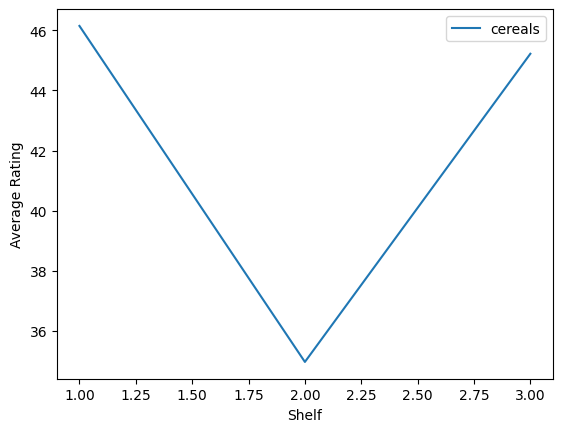

In [25]:
#16	(Matplotlib) Plot a line chart showing the average rating of cereals per shelf (1, 2, 3).
import matplotlib.pyplot as plt

avg_rating = df.groupby('shelf')['rating'].mean()

plt.plot(avg_rating.index,avg_rating.values,label = "cereals")
plt.xlabel("Shelf")
plt.ylabel("Average Rating")
plt.legend()
plt.show()


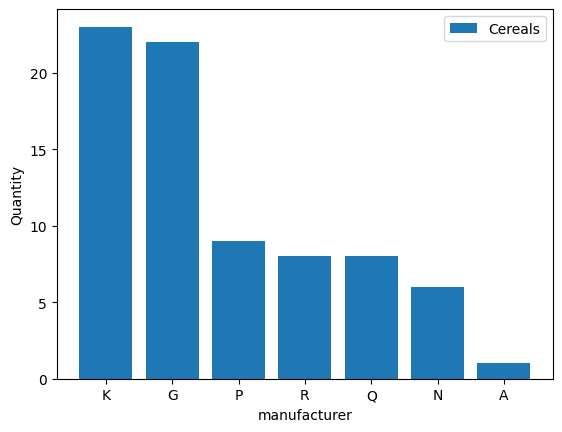

In [188]:
#17(Matplotlib) Plot a bar chart showing the number of cereals per manufacturer.
# Count the number of cereals per manufacturer
cereal_counts = df['manufacturer'].value_counts()

# Plot the bar chart
pd.bar(cereal_counts.index, cereal_counts.values, label="Cereals")
pd.xlabel("manufacturer")
pd.ylabel("Quantity")
pd.legend()
pd.show()

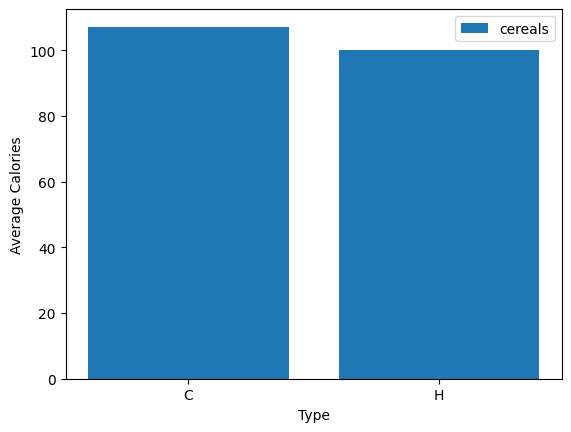

In [ ]:
#18.	(Matplotlib) Create a barplot showing the average calories for each type (cold vs hot cereal)

avg_calories = df.groupby('type')['calories'].mean()

pd.bar(avg_calories.index,avg_calories.values,label = "cereals")
pd.xlabel("Type")
pd.ylabel("Average Calories")
pd.legend()
pd.show()